# 03_visualization
Visualizing atomic and big graphs

In [12]:
# set ligning path (optional if installed via pip)
import sys, os
project_path = os.path.abspath(os.path.join(os.getcwd(), '..\..\..'))
print(project_path)
sys.path.insert(0, project_path)


import os
import numpy as np
import time

import ligning.monomer as mono
import ligning.polymer as poly
import ligning.utils as ut


import networkx as nx
import time 
from rdkit import Chem

output_path = os.path.join(os.getcwd(), 'demo_results', 'molecules')

c:\Users\yifan\Documents\GitHub\LigninGraphs


Create a polymer

Connect a H to a H unit (in polymer) via a beta-O-4 bond
Connect a H to a G unit (in polymer) via a beta-O-4 bond
Connect a G to a S unit (in polymer) via a beta-O-4 bond
Connect a S to a G unit (in polymer) via a beta-O-4 bond
Connect a H to a S unit (in polymer) via a beta-O-4 bond
Connect a S to a G unit (in polymer) via a beta-O-4 bond
Connect a G to a S unit (in polymer) via a beta-O-4 bond
Connect a S to a G unit (in polymer) via a beta-O-4 bond
Connect a G to a S unit (in polymer) via a beta-O-4 bond
Connect a G to a G unit (in polymer) via a beta-O-4 bond
Connect a S to a S unit (in polymer) via a beta-O-4 bond
Lignin polymerization: 12 monomers takes  0.03 s


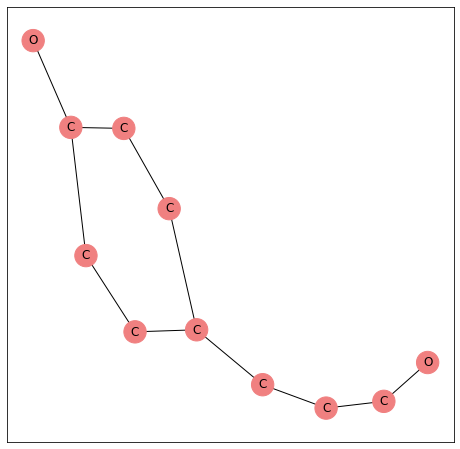

In [6]:

'''
Starting from a H monomer
'''
P0 = mono.Monomer("H")
polymer = poly.Polymer(P0)
G1 = polymer.G.copy()
ut.draw_atomic_graph(G1)

'''
Add a H monomer with beta-O-4 bond
'''
polymer.add_specific_linkage('beta-O-4', monomer_type = 'H')


#%%
'''
#Add n random monomers with beta-O-4 bonds and time the speed
'''
# 100 monomer takes ~0.9s
# 1000 monomer takes ~80s
start = time.time()
n_iter = 10
for i in range(n_iter):
    if i%2 ==0:
        polymer.add_specific_linkage('beta-O-4', monomer_type =  'G')
    else:
        polymer.add_specific_linkage('beta-O-4', monomer_type =  'S')
end = time.time()

n_monomer = n_iter + 2
run_time = end - start 

print("Lignin polymerization: %2d monomers takes %5.2f s" %(n_monomer, run_time))


Plot the atomic graph

Drawing atomic graph:


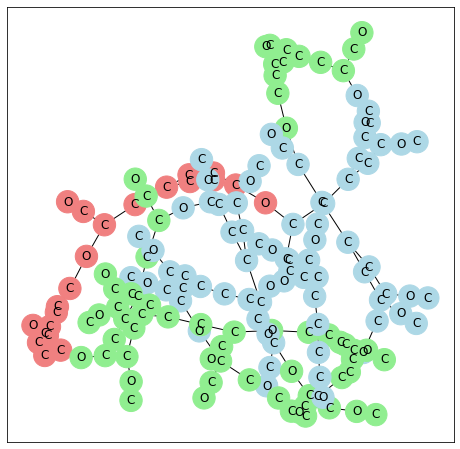

In [7]:
print('Drawing atomic graph:')
ut.draw_atomic_graph(polymer.G)

Plot the big graph

Drawing big graph:


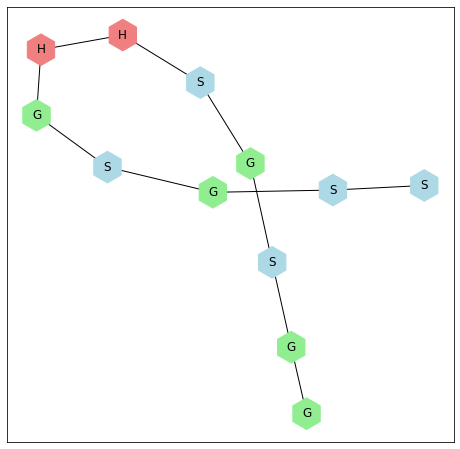

In [8]:
print('Drawing big graph:')
ut.draw_big_graph(polymer.bigG)

 Convert graph to smiles

In [9]:
Pn_smiles = ut.graph_to_smile(polymer.G)
print('The SMILES of the polymer is: {}'.format(Pn_smiles))

The SMILES of the polymer is: OCC(Oc1ccc(CC(Oc2c(OC)cc(CC(Oc3c(OC)cc(CC(Oc4c(OC)cc(CC(Oc5c(OC)cc(CC(Oc6c(OC)cc(C=CCO)cc6OC)CO)cc5OC)CO)cc4)CO)cc3OC)CO)cc2)CO)cc1)Cc1ccc(OC(CO)Cc2cc(OC)c(OC(CO)Cc3cc(OC)c(OC(CO)Cc4cc(OC)c(OC(CO)Cc5cc(OC)c(OC(CO)Cc6cc(OC)c(O)cc6)cc5)c(OC)c4)cc3)c(OC)c2)cc1


Convert smiles to mol and save the mol structure to an image file

Drawing the molecular structure: 


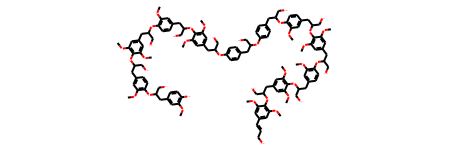

In [10]:
Pn_mol = ut.graph_to_mol(polymer.G, save_mol=True, name='mol_structure_viz', save_path=output_path)
print('Drawing the molecular structure: ')
Pn_mol